Original image shape: (1365, 2048), dtype: uint8
Optimal threshold determined by Otsu's method: 99


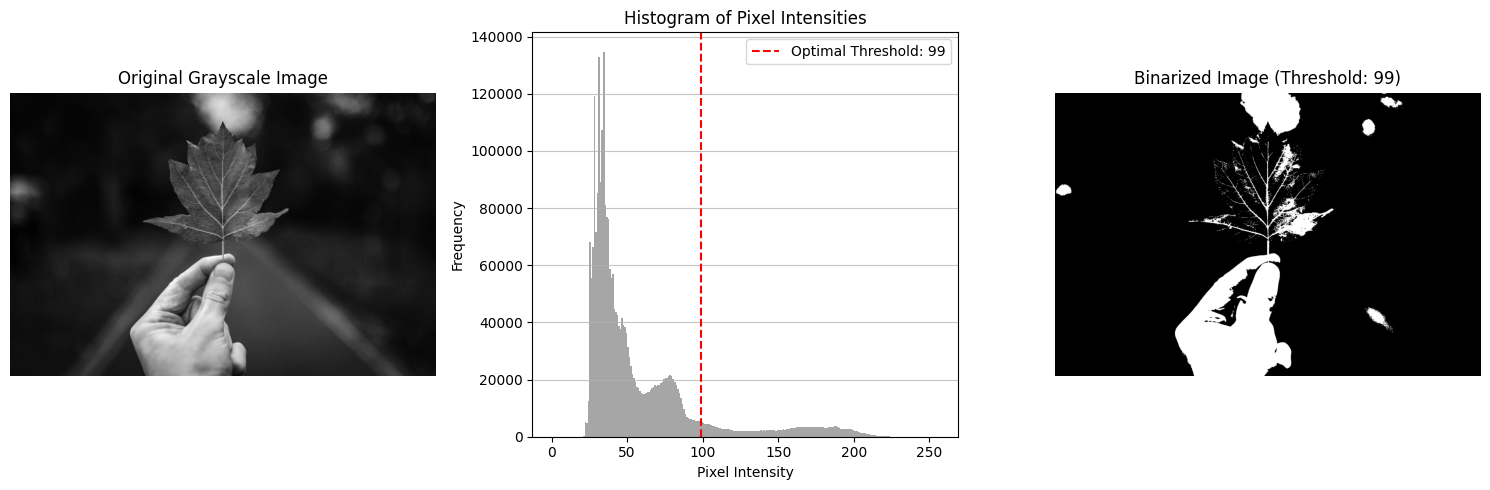

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def otsu_thresholding(image):
    """
    Implements Otsu's method to find the optimal threshold value for a grayscale image.

    Args:
        image (numpy.ndarray): A 2D numpy array representing the grayscale image.
                               Pixel values should be in the range [0, 255].

    Returns:
        int: The optimal threshold value determined by Otsu's method.
    """
    # Check if the image is grayscale
    if len(image.shape) > 2:
        raise ValueError("Input image must be grayscale.")

    # Convert image to 8-bit unsigned integer if it's not already
    image = image.astype(np.uint8)

    # Calculate the histogram of pixel intensities
    # The histogram will have 256 bins for pixel values 0-255
    hist = cv2.calcHist([image], [0], None, [256], [0, 256]).flatten()
    
    # Normalize the histogram to get probabilities
    # Divide each bin count by the total number of pixels
    total_pixels = image.shape[0] * image.shape[1]
    hist_norm = hist / total_pixels

    # Initialize variables to store the best threshold and maximum between-class variance
    optimal_threshold = 0
    max_between_variance = 0.0

    # Iterate through all possible threshold values (0 to 255)
    for t in range(256):
        # Class 1 (C1): Pixels with intensity <= t (background/foreground)
        # Class 2 (C2): Pixels with intensity > t (foreground/background)

        # Calculate probabilities of each class
        # Probability of Class 1 (P1): sum of normalized histogram values up to t
        P1 = np.sum(hist_norm[:t+1])
        # Probability of Class 2 (P2): sum of normalized histogram values from t+1 to 255
        P2 = np.sum(hist_norm[t+1:])
        
        # Handle cases where one of the classes is empty to avoid division by zero
        if P1 == 0 or P2 == 0:
            continue

        # Calculate mean intensity for Class 1
        # Sum of (intensity * probability) for pixels in Class 1, then divide by P1
        mean_C1 = np.sum(np.arange(t+1) * hist_norm[:t+1]) / P1
        
        # Calculate mean intensity for Class 2
        # Sum of (intensity * probability) for pixels in Class 2, then divide by P2
        mean_C2 = np.sum(np.arange(t+1, 256) * hist_norm[t+1:]) / P2

        # Calculate the between-class variance for the current threshold 't'
        # Formula: P1 * P2 * (mean_C1 - mean_C2)^2
        between_variance = P1 * P2 * ((mean_C1 - mean_C2) ** 2)

        # Update the optimal threshold if the current between-class variance is higher
        if between_variance > max_between_variance:
            max_between_variance = between_variance
            optimal_threshold = t

    return optimal_threshold

# --- Main part of the script to apply Otsu's method and visualize results ---

# 1. Load a sample image and convert it to grayscale [cite: 17]
# You can replace 'sample_image.jpg' with your own image file.
# Make sure the image file is in the same directory as your Jupyter Notebook,
# or provide the full path to the image.
try:
    original_image = cv2.imread('sample_image2.jpeg', cv2.IMREAD_GRAYSCALE)
    if original_image is None:
        raise FileNotFoundError("Image not found. Please ensure 'sample_image.jpg' exists.")
except Exception as e:
    print(f"Error loading image: {e}")
    # Create a dummy image for demonstration if file not found
    print("Creating a dummy image for demonstration purposes.")
    original_image = np.array([
        [10, 20, 30, 40, 50],
        [60, 70, 80, 90, 100],
        [110, 120, 130, 140, 150],
        [160, 170, 180, 190, 200],
        [210, 220, 230, 240, 250]
    ], dtype=np.uint8)


print(f"Original image shape: {original_image.shape}, dtype: {original_image.dtype}")

# 2. Apply your otsu_thresholding function to find the optimal threshold [cite: 18]
optimal_threshold = otsu_thresholding(original_image)
print(f"Optimal threshold determined by Otsu's method: {optimal_threshold}")

# 3. Use this threshold to binarize the image [cite: 19]
# Pixels with intensity > optimal_threshold become 255 (white), otherwise 0 (black)
_, binarized_image = cv2.threshold(original_image, optimal_threshold, 255, cv2.THRESH_BINARY)

# 4. Visualize the results [cite: 21, 22]
plt.figure(figsize=(15, 5))

# Plot 1: Original Image
plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Plot 2: Histogram of Pixel Intensities with Threshold
plt.subplot(1, 3, 2)
plt.hist(original_image.flatten(), bins=256, range=[0, 256], color='gray', alpha=0.7)
plt.axvline(x=optimal_threshold, color='red', linestyle='--', label=f'Optimal Threshold: {optimal_threshold}')
plt.title('Histogram of Pixel Intensities')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.75)

# Plot 3: Binarized Image
plt.subplot(1, 3, 3)
plt.imshow(binarized_image, cmap='gray')
plt.title(f'Binarized Image (Threshold: {optimal_threshold})')
plt.axis('off')

plt.tight_layout()
plt.show()